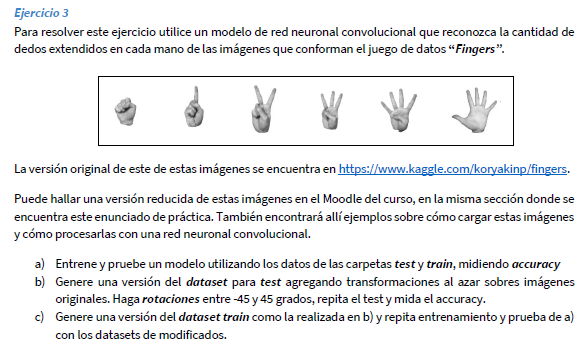

In [13]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import rotate
import numpy as np
import glob
import matplotlib.pyplot as plt


IMG_ERROR = 'No hay imágenes para cargar. Verificar que la ruta sea correcta y que la carpeta tenga imagenes con la extensión usada'

def import_data(img_list):
    img_data = []
    label_data = []
    
    img_count = len(img_list)
    for i in range(0,img_count):
        img = img_list[i]
        img_read = io.imread(img)
        img_read = img_read/img_read.max() # normaliza pixeles entre 0 y 1
        img_read = img_read.reshape((*img_read.shape,1)) # formatea imagen como requiere TF
        img_data.append(img_read)          # agrega a lista de imágenes a procesar
        label_data.append(img[-6])         # extrae cant. dedos del nombre del archivo
        # muestra progreso en la carga
        if i % 100 == 0:
            print("\rCargando imágenes: %6.2f%%" % (100*i/img_count), end="")
    print("\rCargando imágenes:  100.00%% (%d) \n" % img_count)
        
    return np.array(img_data), np.array(label_data)

# %% Carga y procesa imagenes de entrenamiento y testeo

# lista de archivos a procesar
train_img_list = glob.glob(DATOS_DIR+"Fingers/train/*.png")
assert len(train_img_list) > 0, IMG_ERROR 

# carga las imagenes a partir de los nombres de archivos
xtrain, ytrain = import_data(train_img_list)

# lista de archivos a procesar
test_img_list = glob.glob(DATOS_DIR+"Fingers/test/*.png")

# carga las imagenes a partir de los nombres de archivos
xtest, ytest = import_data(test_img_list)

Cargando imágenes:  100.00% (17999) 

Cargando imágenes:  100.00% (3600) 



In [15]:
io.imread(train_img_list[0]).shape 

(64, 64)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 31, 31, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5683 - loss: 1.3561 - val_accuracy: 0.9650 - val_loss: 0.2396
Epoch 2/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1909 - val_accuracy: 0.9839 - val_loss: 0.1034
Epoch 3/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0923 - val_accuracy: 0.9936 - val_loss: 0.0537
Epoch 4/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0511 - val_accuracy: 0.9961 - val_loss: 0.0400
Epoch 5/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9958 - loss: 0.0343 - val_accuracy: 0.9981 - val_loss: 0.0244
Epoch 6/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0247 - val_accuracy: 0.9978 - val_loss: 0.0232
Epoch 7/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0179 - val_accuracy: 0.9992 - val_loss: 0.0132
Epoch 8/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0136 - val_accuracy: 0.

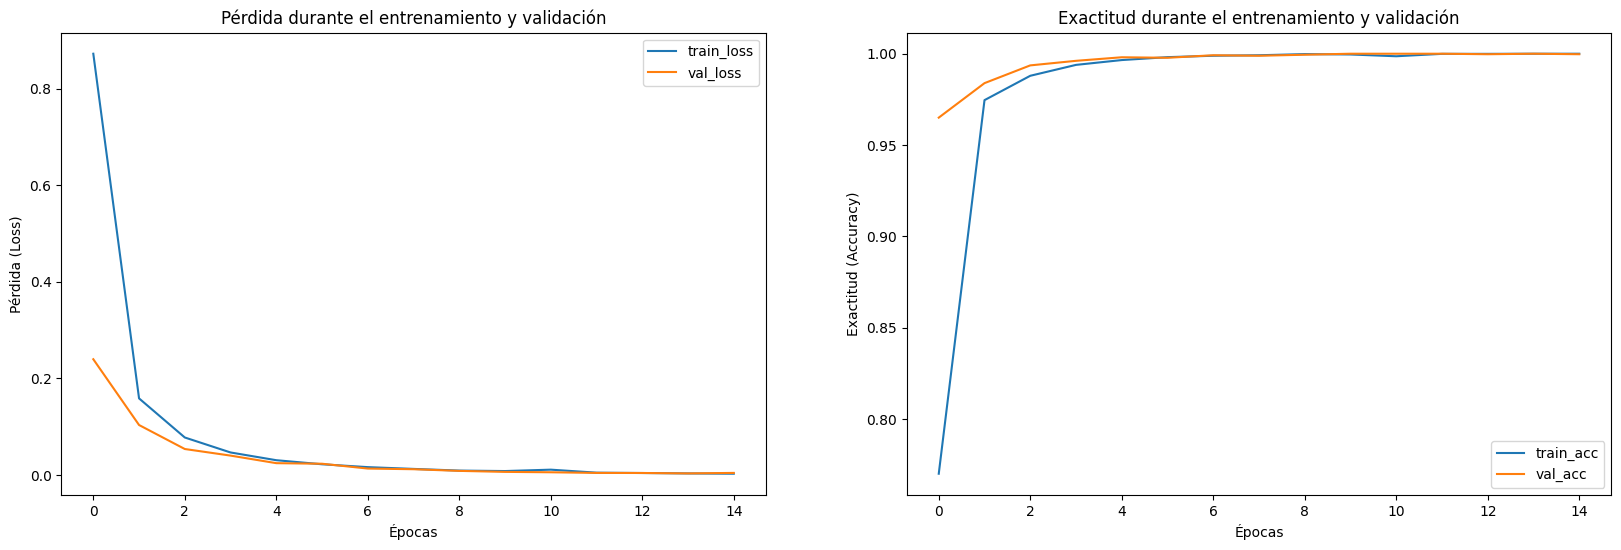

<Figure size 640x480 with 0 Axes>

In [16]:
EPOCAS = 15
LOTES  = 50
PACIENCIA = 3
IMG_SIZE = (64, 64, 1)
N_CLASSES = len(np.unique(ytrain))

# conviertes el id de la clase en "one hot encoding": 3 => [0,0,0,1,0,0]
ytest = to_categorical(ytest, num_classes = N_CLASSES)
ytrain = to_categorical(ytrain, num_classes = N_CLASSES)

# separa los datos y clase en grupo de entrenamiento y validacion
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size = 0.20, shuffle = True)

# %% construye el modelo
def build_model(img_size, classes):
    model = Sequential()

    model.add(Input(shape=img_size))
    model.add(Conv2D(8, kernel_size=(3,3), strides=(2,2), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(classes, activation = 'softmax'))

    model.summary()
    return model

# obtiene la arquitectura para el modelo y lo compila
model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
 

# entrena el modelo y guarda la historia del progreso    
early_stop = EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True, min_delta=0.001)
H = model.fit(x = x_train, y = y_train, batch_size = LOTES, epochs = EPOCAS, validation_data = (x_val, y_val), callbacks=[early_stop])


fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[0].set_title("Pérdida durante el entrenamiento y validación")  # Título del gráfico
axs[0].set_xlabel("Épocas")  # Etiqueta del eje X
axs[0].set_ylabel("Pérdida (Loss)")  # Etiqueta del eje Y
axs[0].legend(loc="upper right")  # Muestra la leyenda en la esquina superior derecha

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")
axs[1].set_title("Exactitud durante el entrenamiento y validación")  # Título del gráfico
axs[1].set_xlabel("Épocas")  # Etiqueta del eje X
axs[1].set_ylabel("Exactitud (Accuracy)")  # Etiqueta del eje Y
axs[1].legend(loc="lower right")  # Muestra la leyenda en la esquina inferior derecha


# %% evalua el modelo para entrenamiento
pred = model.evaluate(xtrain, ytrain, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(xtest, ytest, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))


## Prueba con datos rotados al azar entre -45 y 45

In [42]:
from random import random


def rotar_al_azar(data_imgs, max_ang):
    result = np.zeros_like(data_imgs)
    for i,img in enumerate(data_imgs):
        ang = (random()*2-1)*max_ang
        result[i] = rotate(img, ang)

    return result


xtest_rot = rotar_al_azar(xtest, 45)

# evalua el modelo con los datos de testeo
pred = model.evaluate(xtest_rot, ytest, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

random()*2-1

Efectividad del modelo con datos de Prueba.......:  64.17%


0.16499661759701012

: 